In [1]:
import numpy as np
import matplotlib.pylab as plt

from rss.client import ZArrFromFile

In [2]:
zff = ZArrFromFile('../ENFIELD_2010_4D_FULLSTACK')

PathNotFoundError: nothing found at path ''

In [3]:
from time import time
st = time()
inline, mask = zff.inline(1100)
print ("Elapsed Time : ", time() - st)

Elapsed Time :  0.34540390968322754


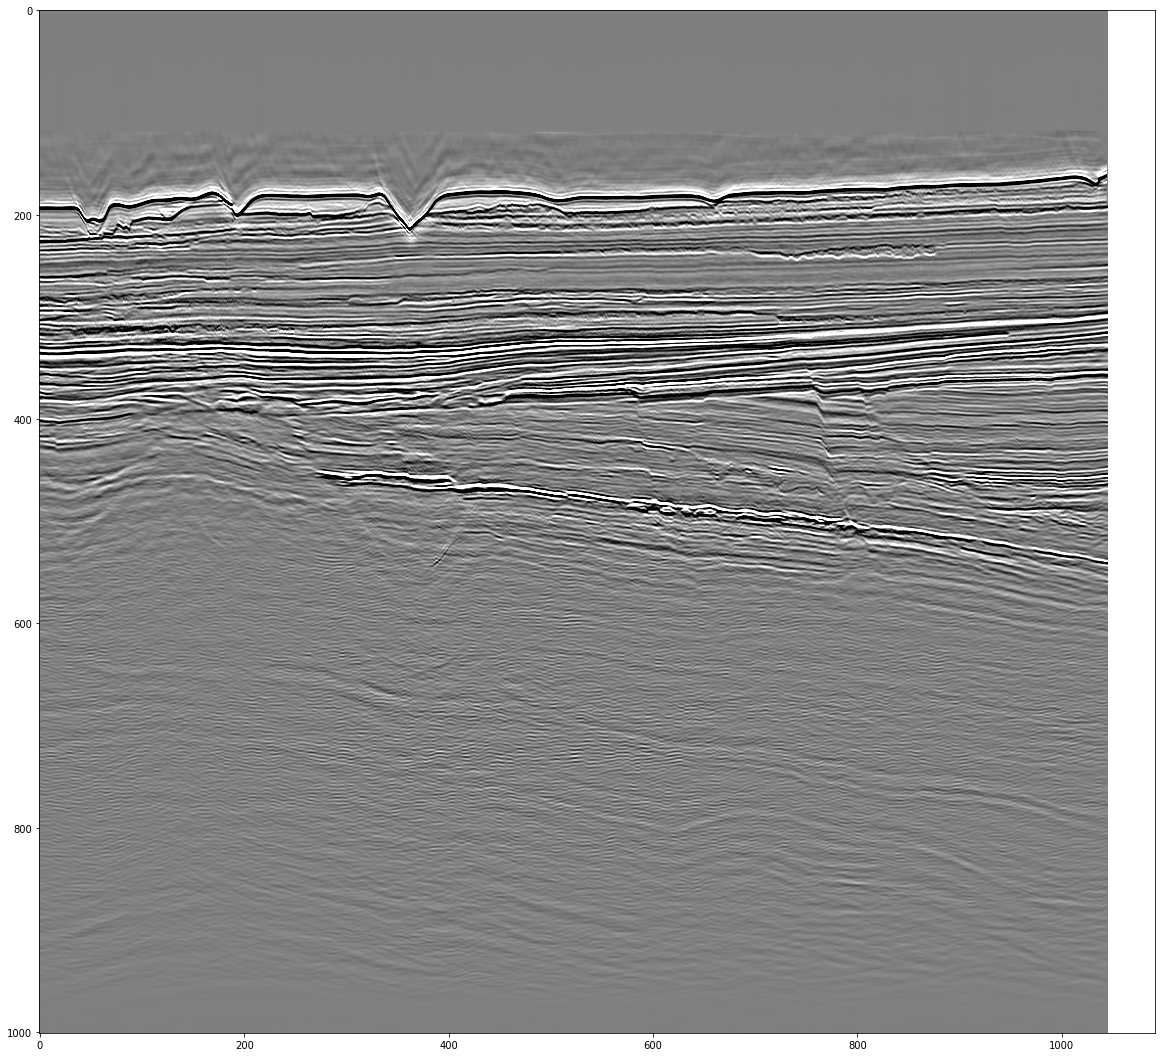

In [4]:
plt.figure(figsize=(20,20))
plt.imshow(inline, cmap='gray', vmin=-2*np.std(inline[~mask]), vmax=2*np.std(inline[~mask]))
plt.show()

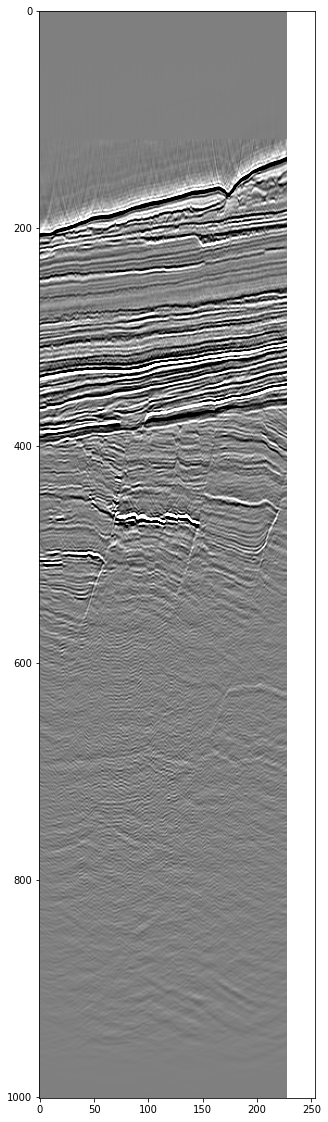

In [5]:
crossline, mask = zff.crossline(1900)
plt.figure(figsize=(20,20))
plt.imshow(crossline.T, cmap='gray', vmin=-2*np.std(crossline[~mask]), vmax=2*np.std(crossline[~mask]))
plt.show()